<a href="https://colab.research.google.com/github/kolhesamiksha/Classification_models/blob/main/WineQuality_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<font color='Orange'>         WineQuality Multiclass Classification Model**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### <font color= 'paleyellow'> **Statistical analysis of data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

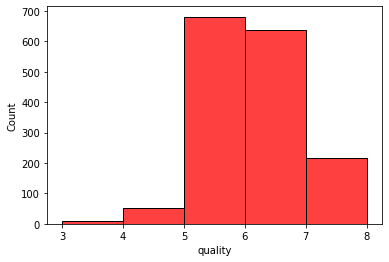

In [19]:
sns.histplot(df['quality'],binwidth=1,legend=True,color='red')

### <font color= 'paleyellow'> **Correlation**

In [20]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


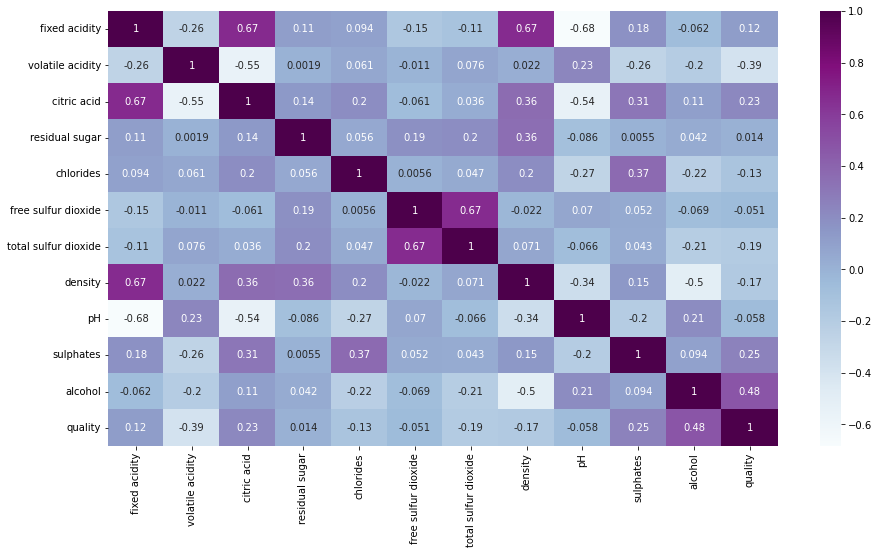

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True,cmap='BuPu')

From above we can see that: 
1. volatile acidity
2. alcohol
3. total sulphur dioxide

Affects a lot on wine-quality.  

### <font color= 'paleyellow'> **Outlier treatment after feature selection**

In [22]:
import seaborn as sb


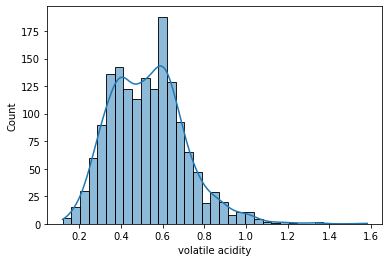

In [23]:
sb.histplot(df['volatile acidity'],kde=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f185e03b8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f185ddd0c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f185ddd7250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f185ddd7490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f185e03bb90>,
  <matplotlib.lines.Line2D at 0x7f185ddd0950>]}

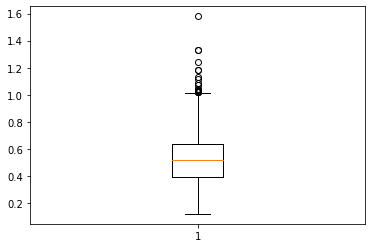

In [24]:
plt.boxplot(df['volatile acidity'])

In [25]:
df = df[df['volatile acidity']<1.2]

{'boxes': [<matplotlib.lines.Line2D at 0x7f185dfa1fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f185df976d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f187260ecd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1872617050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f185dfa1f50>,
  <matplotlib.lines.Line2D at 0x7f185df97a50>]}

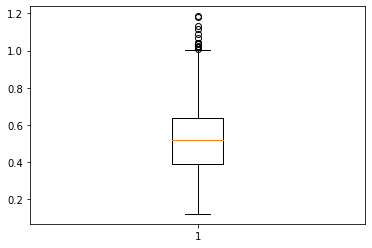

In [26]:
plt.boxplot(df['volatile acidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


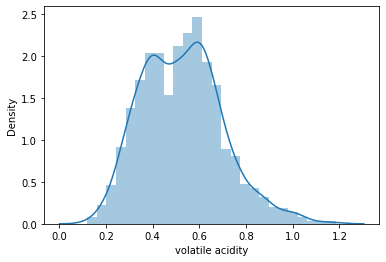

In [27]:
sb.distplot(df['volatile acidity'],kde=True)

In [28]:
df['total sulfur dioxide'].describe()

count    1595.000000
mean       46.468966
std        32.796210
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

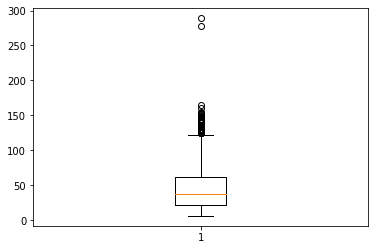

In [29]:
plt.boxplot(df['total sulfur dioxide'])
df = df[df['total sulfur dioxide']<150]

{'boxes': [<matplotlib.lines.Line2D at 0x7f1851810250>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1851816250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f185181f290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1851816d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1851810790>,
  <matplotlib.lines.Line2D at 0x7f1851810cd0>]}

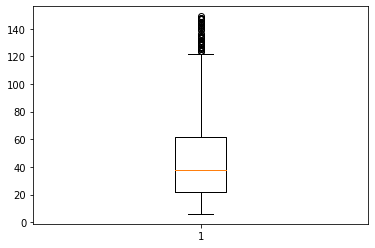

In [30]:
plt.boxplot(df['total sulfur dioxide'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


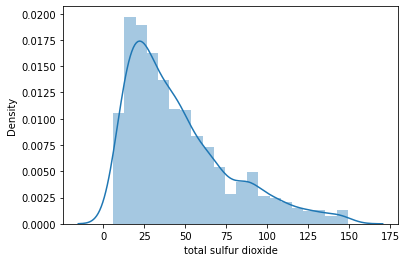

In [31]:
sb.distplot(df['total sulfur dioxide'])


In [32]:
df['total sulfur dioxide'].describe()

count    1587.000000
mean       45.756144
std        31.050625
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       149.000000
Name: total sulfur dioxide, dtype: float64

In [33]:
df['alcohol'].describe()

count    1587.000000
mean       10.421014
std         1.065275
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f18516bbd10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f18516c1d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f18516c9d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f18516c9810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f18516c1290>,
  <matplotlib.lines.Line2D at 0x7f18516c17d0>]}

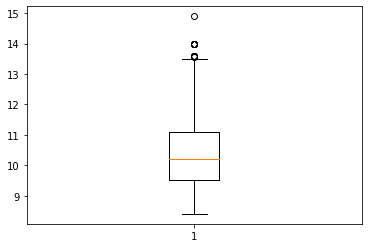

In [34]:
plt.boxplot(df['alcohol'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


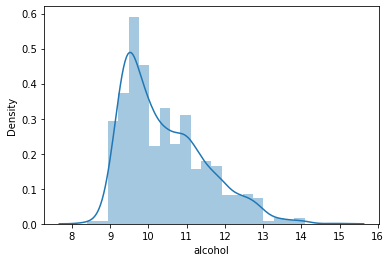

In [35]:
sb.distplot(df['alcohol'])

In [36]:
df = df[df['alcohol']<13.5]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


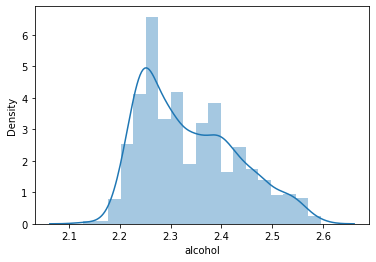

In [37]:
df['alcohol'] = np.log(df['alcohol'])
sb.distplot(df['alcohol'])

In [38]:
#for i in df.columns:
  #df[i]= df[i]/df[i].std()

### <font color= 'paleyellow'> **PCA for model selection**

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(df)
scaler_data = ss.transform(df)

Text(0, 0.5, 'second')

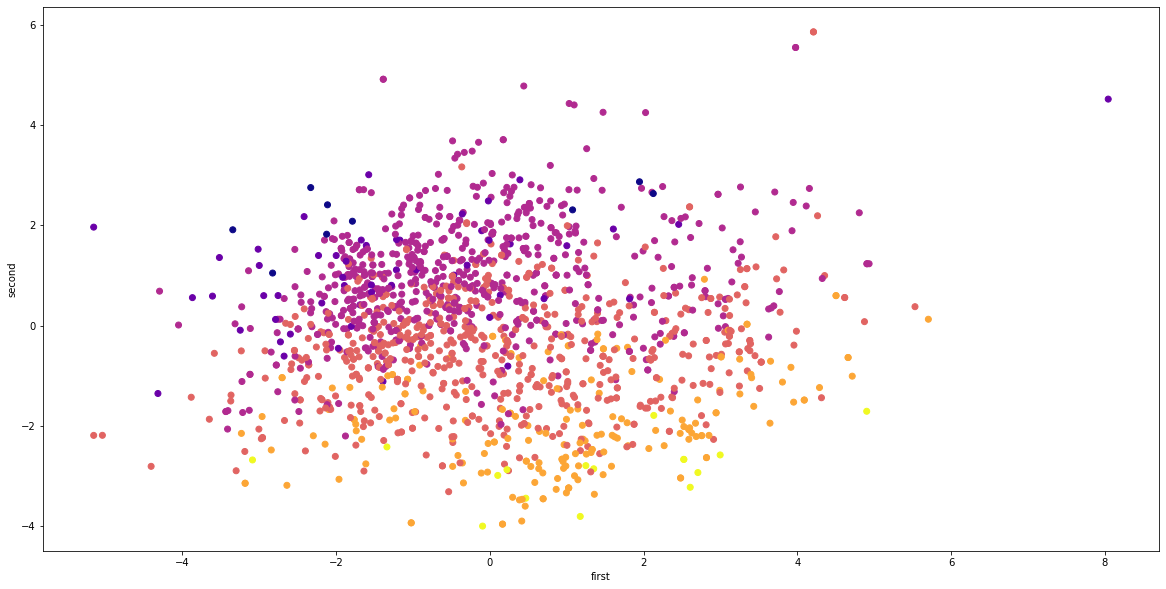

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaler_data)
pca_d = pca.transform(scaler_data)
plt.figure(figsize=(20,10))
plt.scatter(pca_d[:,0],pca_d[:,1],c=df['quality'],cmap='plasma')
plt.xlabel("first")
plt.ylabel("second")

In [41]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [42]:
Y = df['quality']
X = df.drop('quality',axis=1)
#X = df.drop(['quality','fixed acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates'], axis = 1)

In [43]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,2.240710
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,2.282382
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,2.282382
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,2.282382
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,2.240710
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,2.351375
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,2.415914
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,2.397895
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,2.322388


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1,shuffle=True)

In [45]:
df.shape[0]*70/100

1101.1

In [46]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1258, 11)
(315, 11)
(1258,)
(315,)


### <font color='Magenta'> **Polynomial Regression**

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logr  = LogisticRegression(multi_class='ovr',max_iter = 200)
logr.fit(X_train_poly,Y_train)
pred_logr = logr.predict(X_test_poly)
print("Accuracy score is:",accuracy_score(Y_test,pred_logr))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy score is: 0.5714285714285714


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
logr.coef_

In [ ]:
import pandas as pd

### <font color='Magenta'> **Logistic regression using validation score**

In [51]:
from sklearn.metrics import accuracy_score
pred_train = logr.predict(X_train_poly)
score_poly = accuracy_score(Y_train,pred_train)
score_poly

0.581081081081081

### <font color='Magenta'> **Logistic regression using StratifiedKFold**

In [52]:
from sklearn.model_selection import StratifiedKFold
logrr = LogisticRegression(multi_class='ovr')
i=1
fold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in fold.split(X,Y):
  print(f'{i} for KFolfd {fold.n_splits}')
  x_train,x_test = X.iloc[train_index],X.iloc[test_index]
  y_train,y_test = Y.iloc[train_index],Y.iloc[test_index]
  logrr.fit(x_train,y_train)
  pred_skf_te = logrr.predict(x_test)
  score_skf_te = accuracy_score(y_test,pred_skf_te)
  print("test_score",score_skf_te)
  i = i+1

1 for KFolfd 5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


test_score 0.6222222222222222
2 for KFolfd 5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


test_score 0.5396825396825397
3 for KFolfd 5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


test_score 0.5523809523809524
4 for KFolfd 5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


test_score 0.5636942675159236
5 for KFolfd 5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


test_score 0.5859872611464968


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
mean = (0.580952380952381+0.5523809523809524+0.5650793650793651+0.5732484076433121+0.5700636942675159)/5

In [54]:
mean

0.5683449600647054

### <font color='Magenta'> **DecisionTreeClassifier**

In [55]:
from sklearn.tree import DecisionTreeClassifier


In [56]:
fold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
i=1
for train_index,test_index in fold.split(X,Y):
  print(f'{i} for KFolfd {fold.n_splits}')
  x_train1,x_test1 = X.iloc[train_index],X.iloc[test_index]
  y_train1,y_test1 = Y.iloc[train_index],Y.iloc[test_index]
  tree = DecisionTreeClassifier(max_depth=30)
  tree.fit(x_train1,y_train1)
  pred_tree = tree.predict(x_test1)
  print(accuracy_score(y_test1,pred_tree))
  i=i+1

1 for KFolfd 5
0.5968253968253968
2 for KFolfd 5
0.5936507936507937
3 for KFolfd 5
0.5777777777777777
4 for KFolfd 5
0.6401273885350318
5 for KFolfd 5
0.6178343949044586


In [57]:
mean = (0.6031746031746031+0.6126984126984127+0.6095238095238096+0.6401273885350318+0.6273885350318471)/5

In [58]:
mean

0.6185825497927409

### <font color='Magenta'> **Random ForestClassifier using validation score**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,max_depth=10)

In [60]:
rfc.fit(X_train,Y_train)
pred_rfc = rfc.predict(X_test)
print(accuracy_score(Y_test,pred_rfc))

0.6984126984126984


### <font color='Magenta'> **RandomForestClassifier using StratifiedKFold**

In [61]:
i=1
for train_index,test_index in fold.split(X,Y):
  print(f'{i} for KFolfd {fold.n_splits}')
  x_train2,x_test2 = X.iloc[train_index],X.iloc[test_index]
  y_train2,y_test2 = Y.iloc[train_index],Y.iloc[test_index]
  rfc = RandomForestClassifier(n_estimators = 100,max_depth=10)
  rfc.fit(x_train2,y_train2)
  pred_rfc = rfc.predict(x_test2)
  print(accuracy_score(y_test2,pred_rfc)) 


1 for KFolfd 5
0.6825396825396826
1 for KFolfd 5
0.6888888888888889
1 for KFolfd 5
0.6444444444444445
1 for KFolfd 5
0.6719745222929936
1 for KFolfd 5
0.6624203821656051


In [62]:
mean = (0.6984126984126984+0.6698412698412698+0.6317460317460317+0.6815286624203821+0.6751592356687898)/5

In [63]:
mean

0.6713375796178344

### <font color='Magenta'> **Support Vector Classifier with kernel rgb and poly gives good accuracy score**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf',decision_function_shape='ovr')

In [ ]:
i=1
for train_index,test_index in fold.split(X,Y):
  print(f'{i} for KFolfd {fold.n_splits}')
  x_train3,x_test3 = X.iloc[train_index],X.iloc[test_index]
  y_train3,y_test3 = Y.iloc[train_index],Y.iloc[test_index]
  model.fit(x_train3,y_train3)
  pred_svc = model.predict(x_test3)
  print(accuracy_score(y_test3,pred_svc))
  i=i+1

1 for KFolfd 5
0.5333333333333333
2 for KFolfd 5
0.473015873015873
3 for KFolfd 5
0.48253968253968255
4 for KFolfd 5
0.4713375796178344
5 for KFolfd 5
0.5063694267515924


In [ ]:
mean = (0.580952380952381+0.5523809523809524+0.5682539682539682+0.5796178343949044+0.5668789808917197)/5

In [ ]:
mean

0.5696168233747851

Thus Decision Tree and Random Forest have Given Much Better output
1. Logistic regression --> 58%
2. Decision tree --> 60%
3. Random forest classifier --> 70%
3. SVC --> 56%